# Machine Learning July Major Project

Problem statement: Create a classification model to predict whether a person makes over $50k a
year

# Import Libraries and dataset

I will import numpy, pandas and matplotlib for working with the dataset. Next, I will use sklearn for using Machine Learning models. Finally, I'll import the dataset.

In [1]:
# Working with data
import numpy as np
import pandas as pd

# Visualizations
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
%matplotlib inline

# Ignore warnings
import warnings
warnings.filterwarnings('ignore');

Next, I will import the dataset.

In [2]:
columns =['age','workclass','fnlwgt','education','educational-num','marital-status','occupation','relationship','race','gender',
          'capital-gain','capital-loss','hours-per-week','native-country','income']
income_df = pd.read_csv('adult.csv', names = columns)

In [3]:
income_df.head()

age          workclass  fnlwgt   education  educational-num  \
0   39          State-gov   77516   Bachelors               13   
1   50   Self-emp-not-inc   83311   Bachelors               13   
2   38            Private  215646     HS-grad                9   
3   53            Private  234721        11th                7   
4   28            Private  338409   Bachelors               13   

        marital-status          occupation    relationship    race   gender  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital-gain  capital-loss  hours-per-week  native-country  income  
0          2174             0              40   United-States   <=50K  
1             0             0              13   United-States   <=50K  
2             0             0              40   United-States   <=50K  
3             0             0              40   United-States   <=50K  
4             0             0              40            Cuba   <=50K

In [4]:
income_df.describe()

age        fnlwgt  educational-num  capital-gain  \
count  32561.000000  3.256100e+04     32561.000000  32561.000000   
mean      38.581647  1.897784e+05        10.080679   1077.648844   
std       13.640433  1.055500e+05         2.572720   7385.292085   
min       17.000000  1.228500e+04         1.000000      0.000000   
25%       28.000000  1.178270e+05         9.000000      0.000000   
50%       37.000000  1.783560e+05        10.000000      0.000000   
75%       48.000000  2.370510e+05        12.000000      0.000000   
max       90.000000  1.484705e+06        16.000000  99999.000000   

       capital-loss  hours-per-week  
count  32561.000000    32561.000000  
mean      87.303830       40.437456  
std      402.960219       12.347429  
min        0.000000        1.000000  
25%        0.000000       40.000000  
50%        0.000000       40.000000  
75%        0.000000       45.000000  
max     4356.000000       99.000000

# Data Dictionary

# Categorical Attributes

workclass: (categorical) Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

1.Individual work category

education: (categorical) Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters,
1st-4th, 10th, Doctorate, 5th-6th, Preschool.

2.Individual's highest education degree

marital-status: (categorical) Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, 
Married-AF-spouse.

3.Individual marital status

occupation: (categorical) Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, 
Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

4.Individual's occupation

relationship: (categorical) Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

5.Individual's relation in a family

race: (categorical) White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

6.Race of Individual

7.sex: (categorical) Female, Male.

native-country: (categorical) United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India,
Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, 
France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, 
Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

8.Individual's native country

# Data Cleaning

Dealing with Missing Value

In [5]:
income_df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

Attributes workclass, occupation, and native-country most NAs. Let's drop these NA.

In [6]:
income_df.age = income_df.age.astype(float)
income_df['hours-per-week'] = income_df['hours-per-week'].astype(float)

In [7]:
my_df = income_df.dropna()

In [8]:
my_df['predclass'] = my_df['income']
del my_df['income']
my_df['education-num'] = my_df['educational-num']
del my_df['educational-num']

In [9]:
my_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32561 non-null  float64
 1   workclass       32561 non-null  object 
 2   fnlwgt          32561 non-null  int64  
 3   education       32561 non-null  object 
 4   marital-status  32561 non-null  object 
 5   occupation      32561 non-null  object 
 6   relationship    32561 non-null  object 
 7   race            32561 non-null  object 
 8   gender          32561 non-null  object 
 9   capital-gain    32561 non-null  int64  
 10  capital-loss    32561 non-null  int64  
 11  hours-per-week  32561 non-null  float64
 12  native-country  32561 non-null  object 
 13  predclass       32561 non-null  object 
 14  education-num   32561 non-null  int64  
dtypes: float64(2), int64(4), object(9)
memory usage: 3.7+ MB


In [10]:
my_df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
marital-status    0
occupation        0
relationship      0
race              0
gender            0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
predclass         0
education-num     0
dtype: int64

# Feature Engineering

In [11]:
print('workclass',my_df.workclass.unique())
print('education',my_df.education.unique())
print('marital-status',my_df['marital-status'].unique())
print('occupation',my_df.occupation.unique())
print('relationship',my_df.relationship.unique())
print('race',my_df.race.unique())
print('gender',my_df.gender.unique())
print('native-country',my_df['native-country'].unique())
print('predclass',my_df.predclass.unique())

workclass [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
education [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
marital-status [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
occupation [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']
relationship [' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']
race [' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']
gender [' Male' ' Female']
native-country [' United-States' ' Cuba' ' Jamaica' ' India

# Predclass

<AxesSubplot:xlabel='count', ylabel='predclass'>

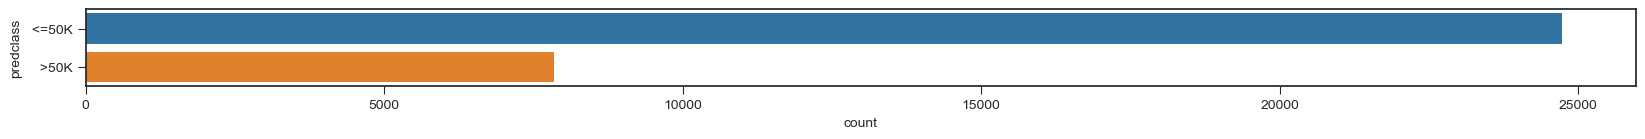

In [12]:
fig = plt.figure(figsize=(20,1))
plt.style.use('seaborn-ticks')
sns.countplot(y="predclass", data=my_df)

Income level less than 50K is more than 3 times of those above 50K, indicating that the the dataset is somewhat skewed. However, since there is no data on the upper limit of adult's income above 50K, it's premature to conclude that the total amount of wealth are skewed towards high income group.

# Education

In [13]:
my_df[['education', 'education-num']].groupby(['education'], as_index=
False).mean().sort_values(by='education-num', ascending=False)

education  education-num
10      Doctorate           16.0
14    Prof-school           15.0
12        Masters           14.0
9       Bachelors           13.0
7      Assoc-acdm           12.0
8       Assoc-voc           11.0
15   Some-college           10.0
11        HS-grad            9.0
2            12th            8.0
1            11th            7.0
0            10th            6.0
6             9th            5.0
5         7th-8th            4.0
4         5th-6th            3.0
3         1st-4th            2.0
13      Preschool            1.0

<AxesSubplot:xlabel='count', ylabel='education'>

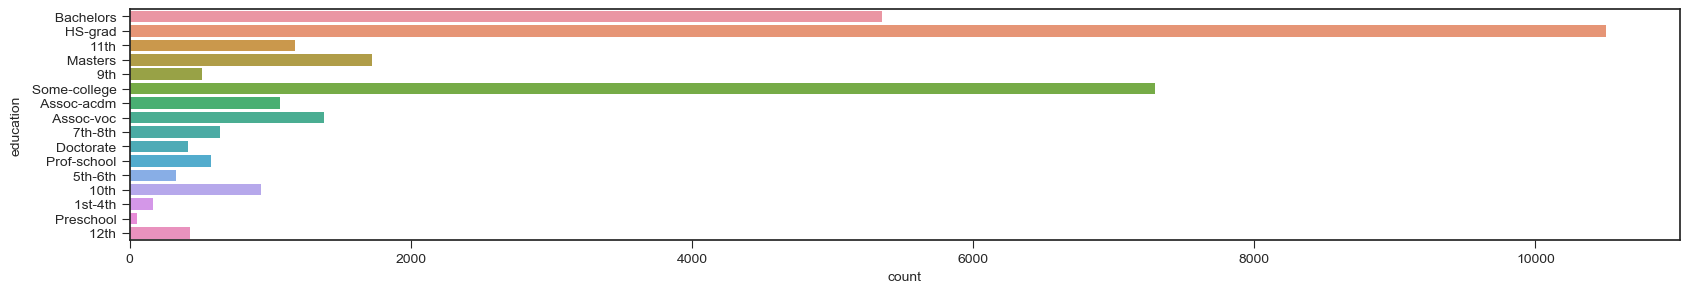

In [14]:
fig = plt.figure(figsize=(20,3))
plt.style.use('seaborn-ticks')
sns.countplot(y="education", data=my_df)

# Martial status

<AxesSubplot:xlabel='count', ylabel='marital-status'>

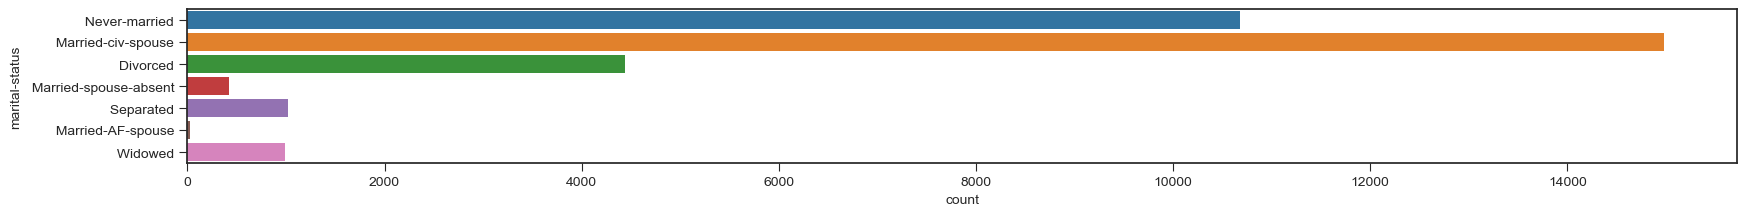

In [15]:
fig = plt.figure(figsize=(20,2))
plt.style.use('seaborn-ticks')
sns.countplot(y="marital-status", data=my_df)

# Occupation

<AxesSubplot:xlabel='count', ylabel='occupation'>

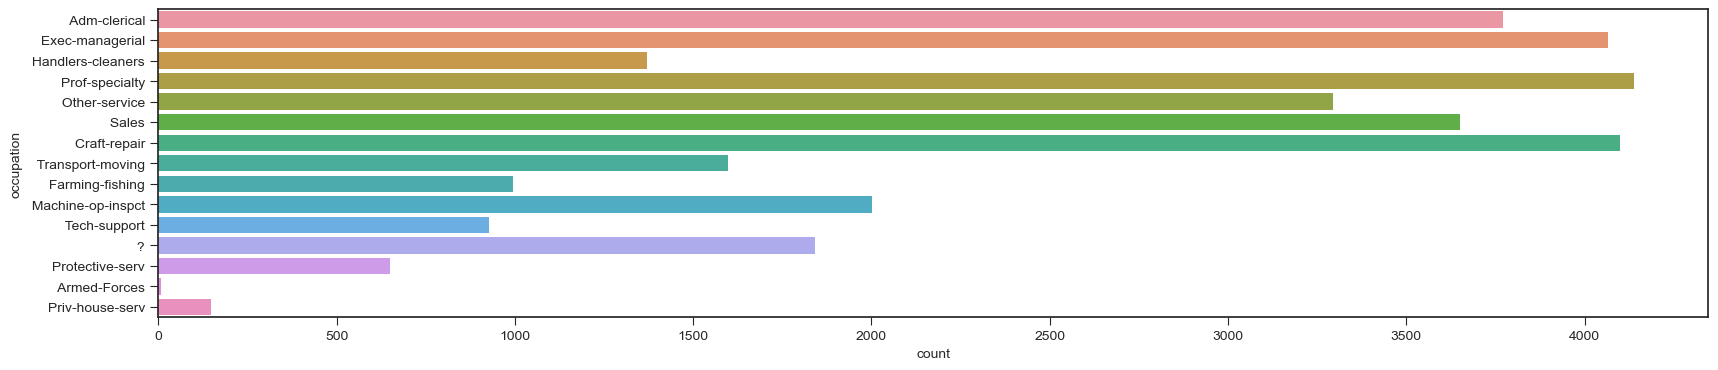

In [16]:
plt.style.use('seaborn-ticks')
plt.figure(figsize=(20,4)) 
sns.countplot(y="occupation", data=my_df)

# Workclass

<AxesSubplot:xlabel='count', ylabel='workclass'>

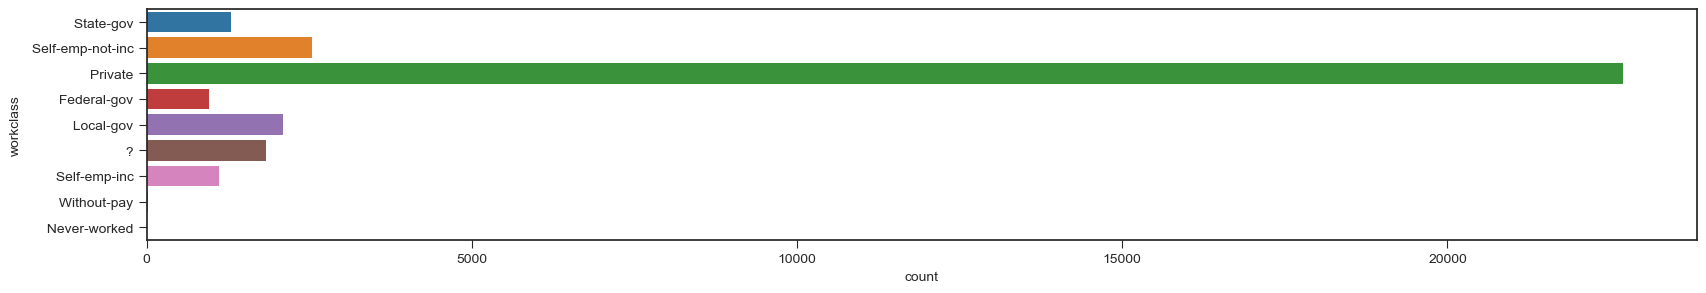

In [17]:
plt.style.use('seaborn-ticks')
plt.figure(figsize=(20,3)) 
sns.countplot(y="workclass", data=my_df)

# Age

In [18]:
my_df['age_bin'] = pd.cut(my_df['age'], 20)

<AxesSubplot:xlabel='age'>

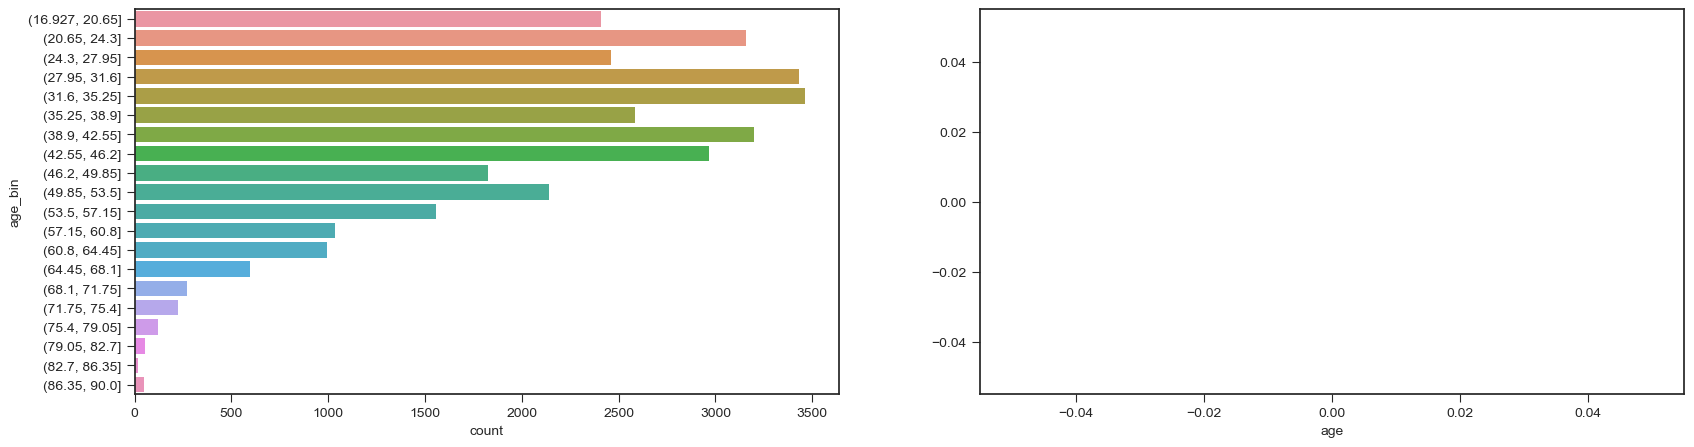

In [19]:
plt.style.use('seaborn-ticks')
fig = plt.figure(figsize=(20,5)) 
plt.subplot(1, 2, 1)
sns.countplot(y="age_bin", data=my_df)
plt.subplot(1, 2, 2)
sns.distplot(my_df[my_df['predclass'] == '>50K']['age'], kde_kws={"label": ">$50K"})
sns.distplot(my_df[my_df['predclass'] == '<=50K']['age'], kde_kws={"label": "<=$50K"})

In [20]:
my_df[['predclass', 'age']].groupby(['predclass'], as_index=False).mean().sort_values(by='age', ascending=False)

predclass        age
1      >50K  44.249841
0     <=50K  36.783738

# Race

<AxesSubplot:xlabel='race', ylabel='prop'>

<Figure size 2000x500 with 0 Axes>

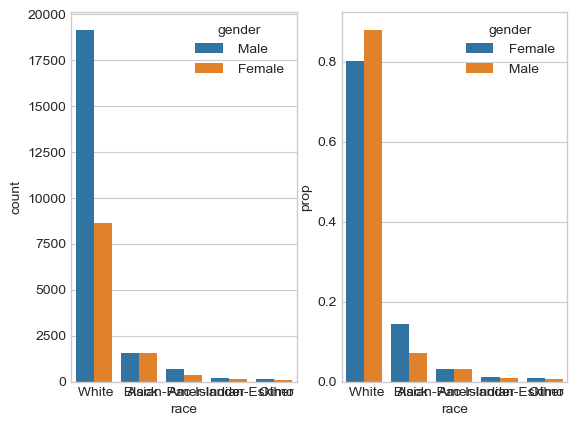

In [21]:
plt.style.use('seaborn-whitegrid')
x, y, hue = "race", "prop", "gender"
#hue_order = ["Male", "Female"]
plt.figure(figsize=(20,5)) 
f, axes = plt.subplots(1, 2)
sns.countplot(x=x, hue=hue, data=my_df, ax=axes[0])

prop_df = (my_df[x]
           .groupby(my_df[hue])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())

sns.barplot(x=x, y=y, hue=hue, data=prop_df, ax=axes[1])

# Hours of work

In [22]:
# Let's use the Pandas Cut function to bin the data in equally sized buckets
my_df['hours-per-week_bin'] = pd.cut(my_df['hours-per-week'], 10)
my_df['hours-per-week'] = my_df['hours-per-week']

(20.0, 60.0)

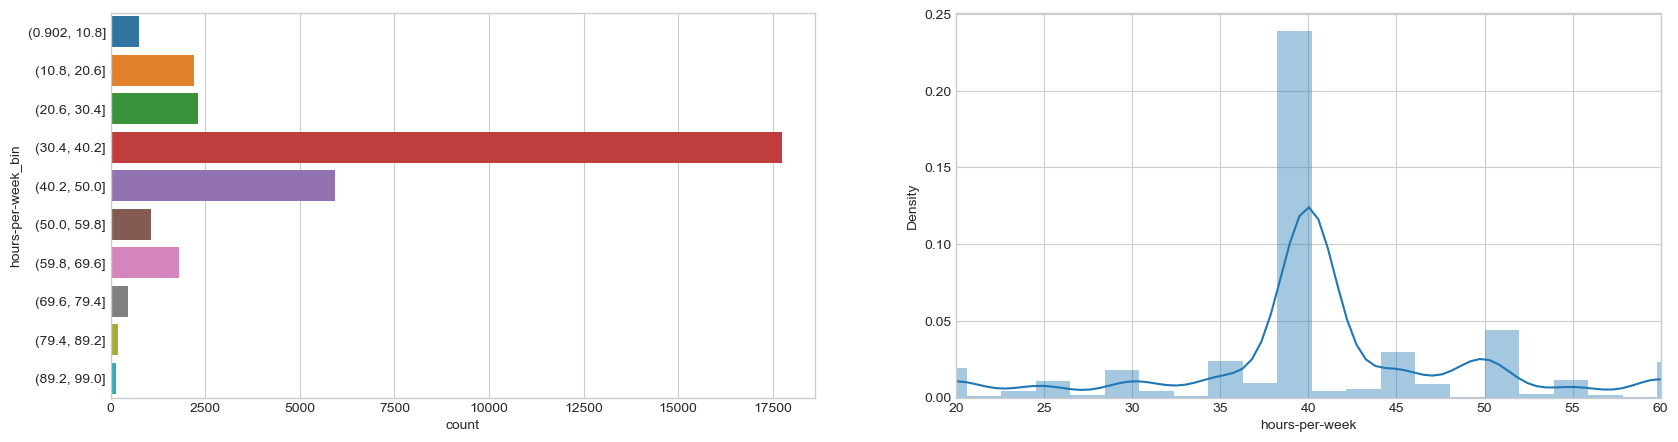

In [23]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(20,5)) 
plt.subplot(1, 2, 1)
sns.countplot(y="hours-per-week_bin", data=my_df);
plt.subplot(1, 2, 2)
sns.distplot(my_df['hours-per-week']);
sns.distplot(my_df[my_df['predclass'] == '>50K']['hours-per-week'], kde_kws={"label": ">$50K"})
sns.distplot(my_df[my_df['predclass'] == '<=50K']['hours-per-week'], kde_kws={"label": "<$50K"})
plt.ylim(0, None)
plt.xlim(20, 60)

# Create a crossing feature: Age + hour of work

<AxesSubplot:xlabel='age', ylabel='hours-per-week'>

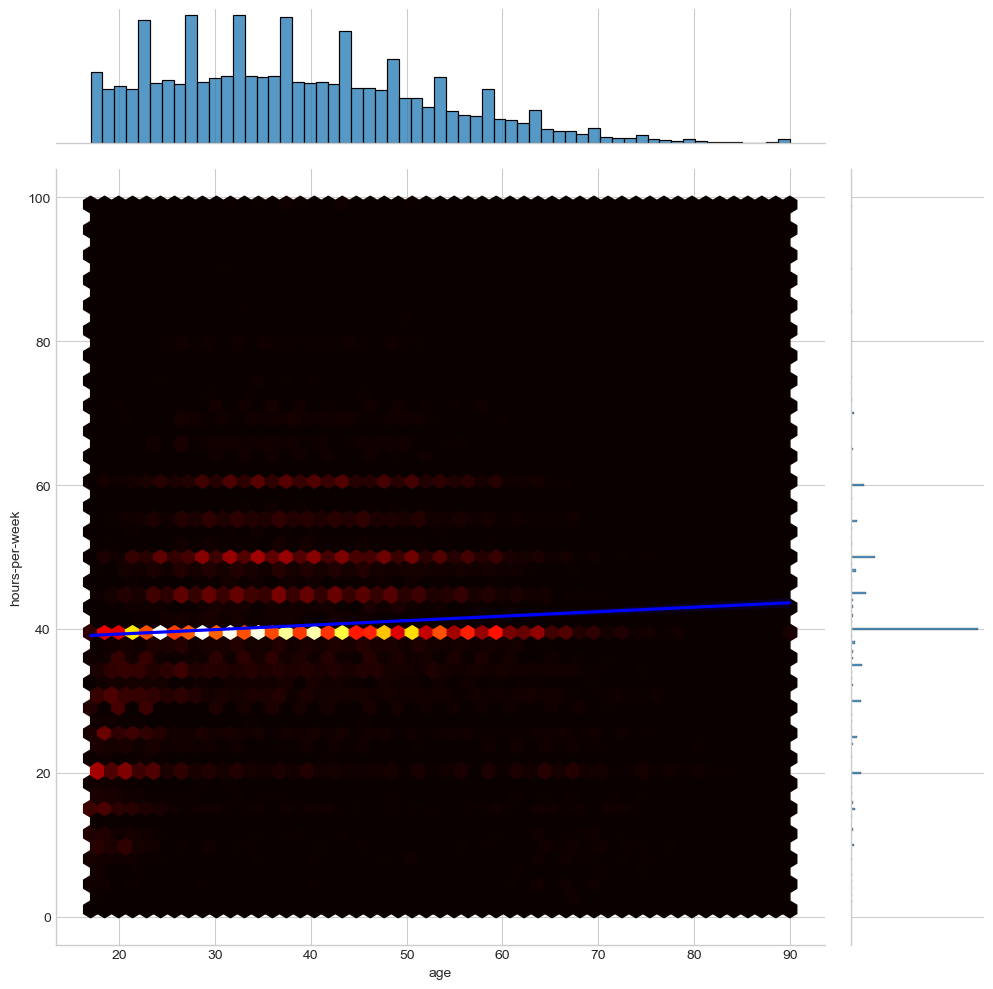

In [24]:
g = sns.jointplot(x = 'age', 
              y = 'hours-per-week',
              data = my_df, 
              kind = 'hex', 
              cmap= 'hot', 
              size=10)

#http://stackoverflow.com/questions/33288830/how-to-plot-regression-line-on-hexbins-with-seaborn
sns.regplot(my_df.age, my_df['hours-per-week'], ax=g.ax_joint, scatter=False, color='Blue')

In [25]:
my_df.head()

age          workclass  fnlwgt   education       marital-status  \
0  39.0          State-gov   77516   Bachelors        Never-married   
1  50.0   Self-emp-not-inc   83311   Bachelors   Married-civ-spouse   
2  38.0            Private  215646     HS-grad             Divorced   
3  53.0            Private  234721        11th   Married-civ-spouse   
4  28.0            Private  338409   Bachelors   Married-civ-spouse   

           occupation    relationship    race   gender  capital-gain  \
0        Adm-clerical   Not-in-family   White     Male          2174   
1     Exec-managerial         Husband   White     Male             0   
2   Handlers-cleaners   Not-in-family   White     Male             0   
3   Handlers-cleaners         Husband   Black     Male             0   
4      Prof-specialty            Wife   Black   Female             0   

   capital-loss  hours-per-week  native-country predclass  education-num  \
0             0            40.0   United-States     <=50K             13   
1             0            13.0   United-States     <=50K             13   
2             0            40.0   United-States     <=50K              9   
3             0            40.0   United-States     <=50K              7   
4             0            40.0            Cuba     <=50K             13   

         age_bin hours-per-week_bin  
0  (38.9, 42.55]       (30.4, 40.2]  
1  (49.85, 53.5]       (10.8, 20.6]  
2  (35.25, 38.9]       (30.4, 40.2]  
3  (49.85, 53.5]       (30.4, 40.2]  
4  (27.95, 31.6]       (30.4, 40.2]

In [26]:
# Crossing Numerical Features
my_df['age-hours'] = my_df['age']*my_df['hours-per-week']
my_df['age-hours_bin'] = pd.cut(my_df['age-hours'], 10)

<AxesSubplot:xlabel='age-hours', ylabel='age-hours_bin'>

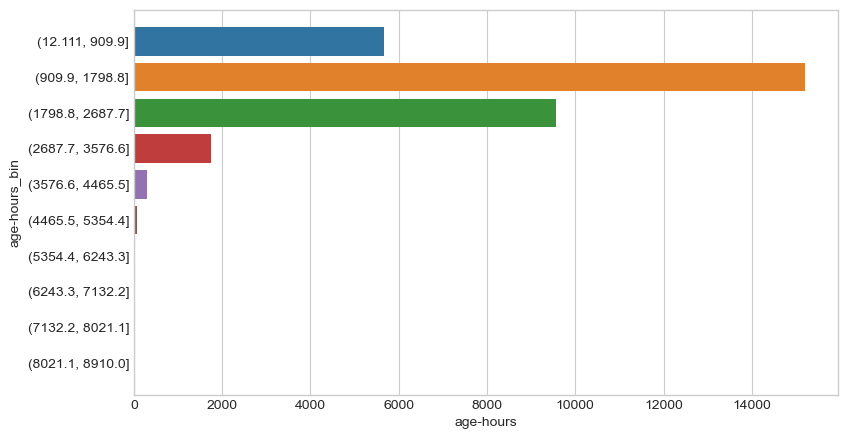

In [27]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(20,5)) 
plt.subplot(1, 2, 1)
sns.countplot(y="age-hours_bin", data=my_df);
sns.distplot(my_df[my_df['predclass'] == '>50K']['age-hours'], kde_kws={"label": ">$50K"})
sns.distplot(my_df[my_df['predclass'] == '<=50K']['age-hours'], kde_kws={"label": "<$50K"})

# EDA

Pair Plot

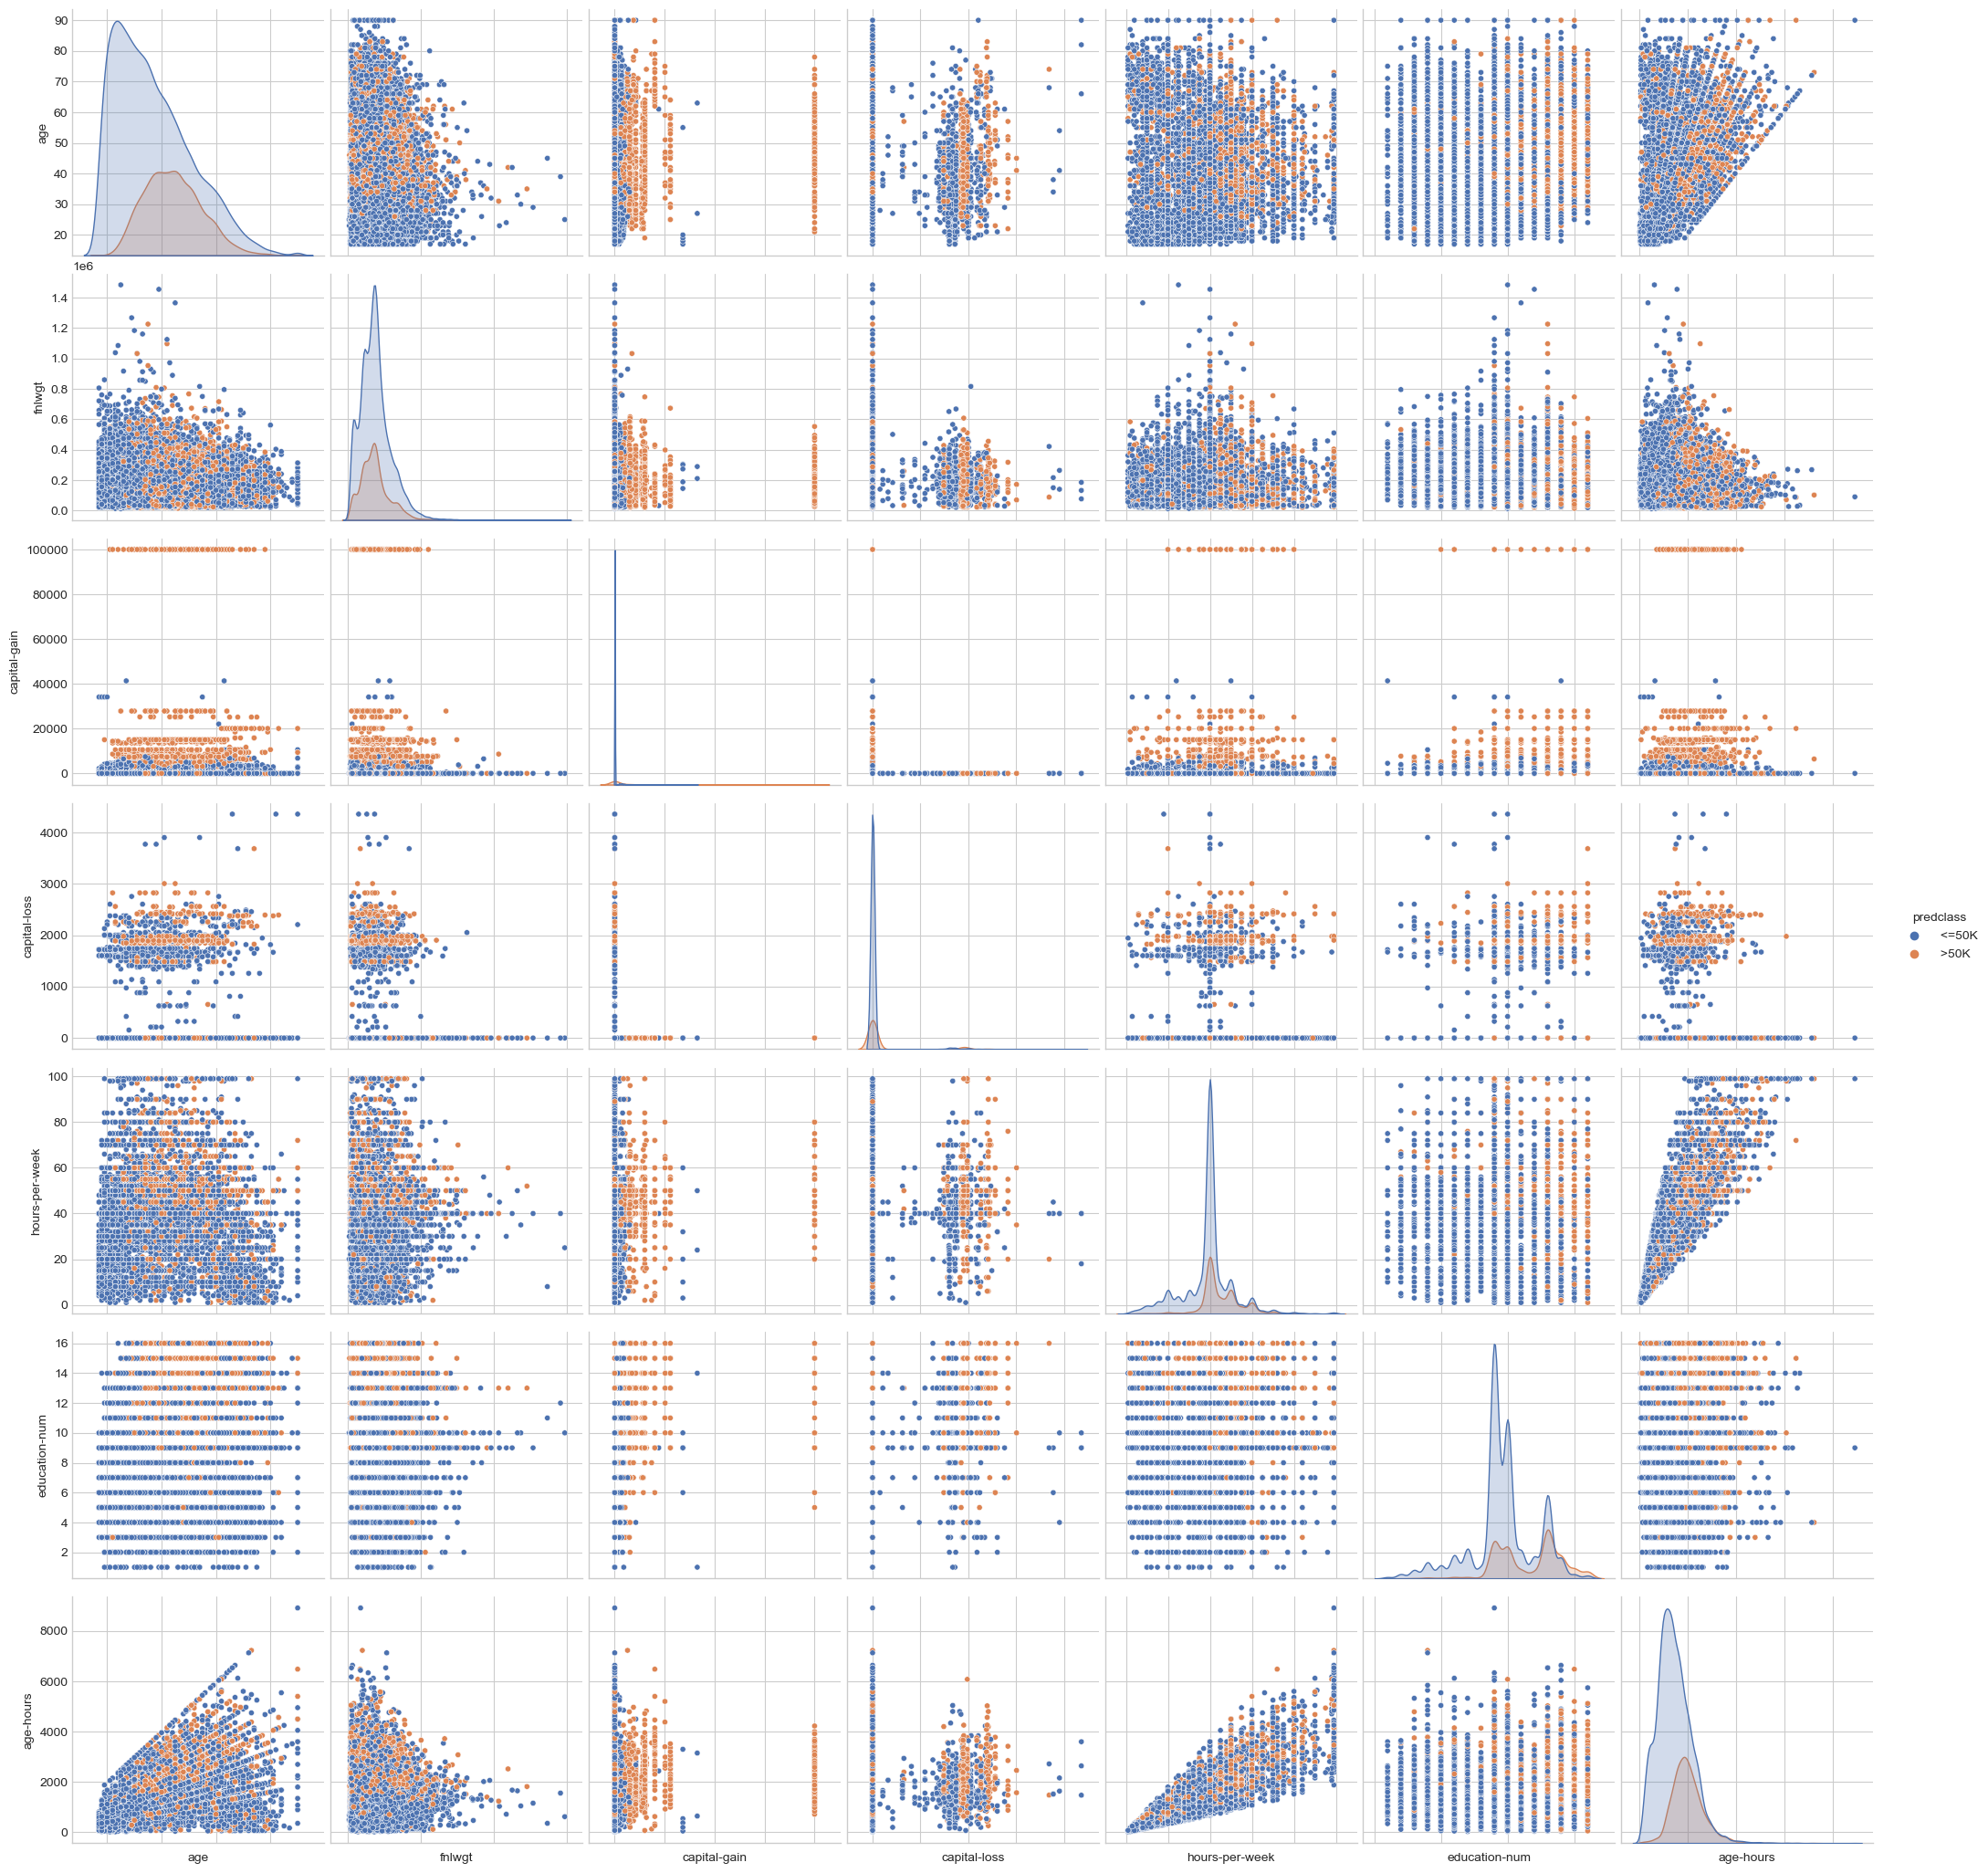

In [28]:
pp = sns.pairplot(my_df, hue = 'predclass', palette = 'deep', 
                  size=3, diag_kind = 'kde', diag_kws=dict(shade=True), plot_kws=dict(s=20) )
pp.set(xticklabels=[])

# Correlation Heatmap

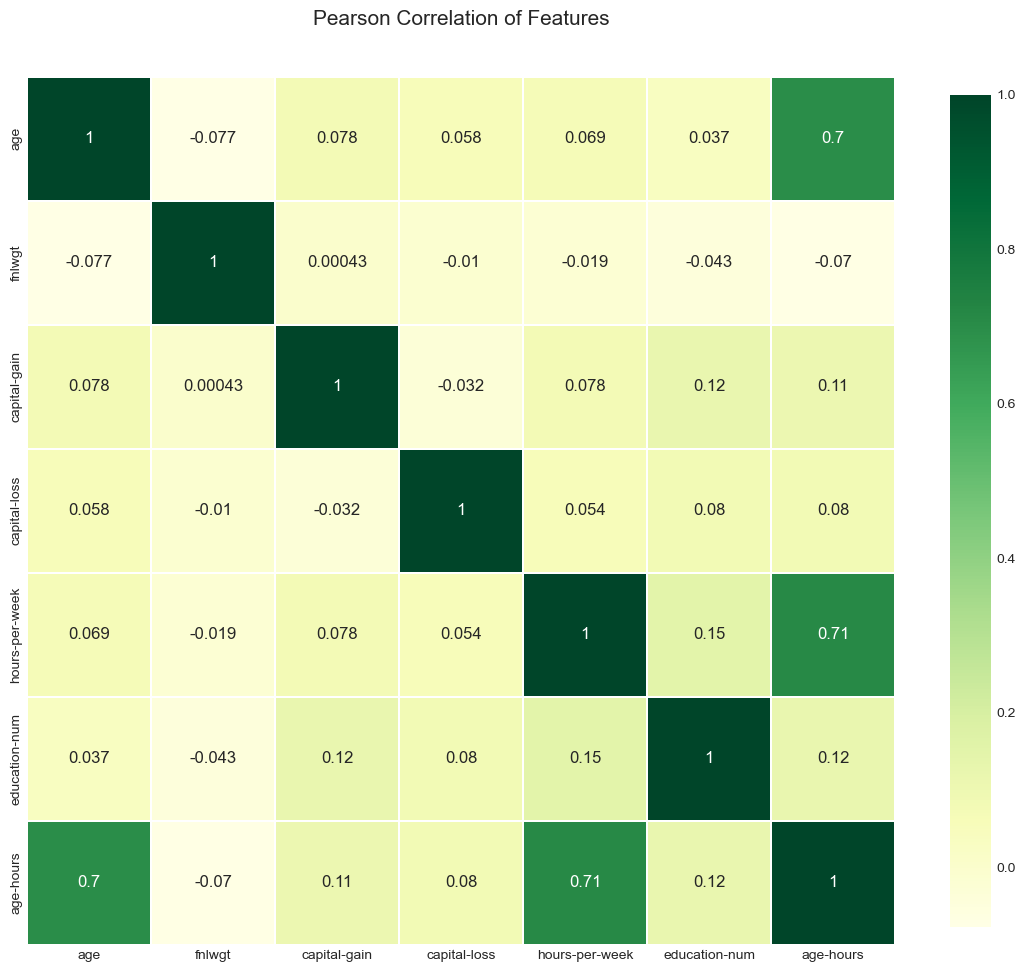

In [29]:
#correlation heatmap of dataset
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = "YlGn",
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(my_df)

# Bivariate Analysis¶

In [30]:
my_df.tail()

age      workclass  fnlwgt    education       marital-status  \
32556  27.0        Private  257302   Assoc-acdm   Married-civ-spouse   
32557  40.0        Private  154374      HS-grad   Married-civ-spouse   
32558  58.0        Private  151910      HS-grad              Widowed   
32559  22.0        Private  201490      HS-grad        Never-married   
32560  52.0   Self-emp-inc  287927      HS-grad   Married-civ-spouse   

               occupation relationship    race   gender  capital-gain  \
32556        Tech-support         Wife   White   Female             0   
32557   Machine-op-inspct      Husband   White     Male             0   
32558        Adm-clerical    Unmarried   White   Female             0   
32559        Adm-clerical    Own-child   White     Male             0   
32560     Exec-managerial         Wife   White   Female         15024   

       capital-loss  hours-per-week  native-country predclass  education-num  \
32556             0            38.0   United-States     <=50K             12   
32557             0            40.0   United-States      >50K              9   
32558             0            40.0   United-States     <=50K              9   
32559             0            20.0   United-States     <=50K              9   
32560             0            40.0   United-States      >50K              9   

             age_bin hours-per-week_bin  age-hours     age-hours_bin  
32556  (24.3, 27.95]       (30.4, 40.2]     1026.0   (909.9, 1798.8]  
32557  (38.9, 42.55]       (30.4, 40.2]     1600.0   (909.9, 1798.8]  
32558  (57.15, 60.8]       (30.4, 40.2]     2320.0  (1798.8, 2687.7]  
32559  (20.65, 24.3]       (10.8, 20.6]      440.0   (12.111, 909.9]  
32560  (49.85, 53.5]       (30.4, 40.2]     2080.0  (1798.8, 2687.7]

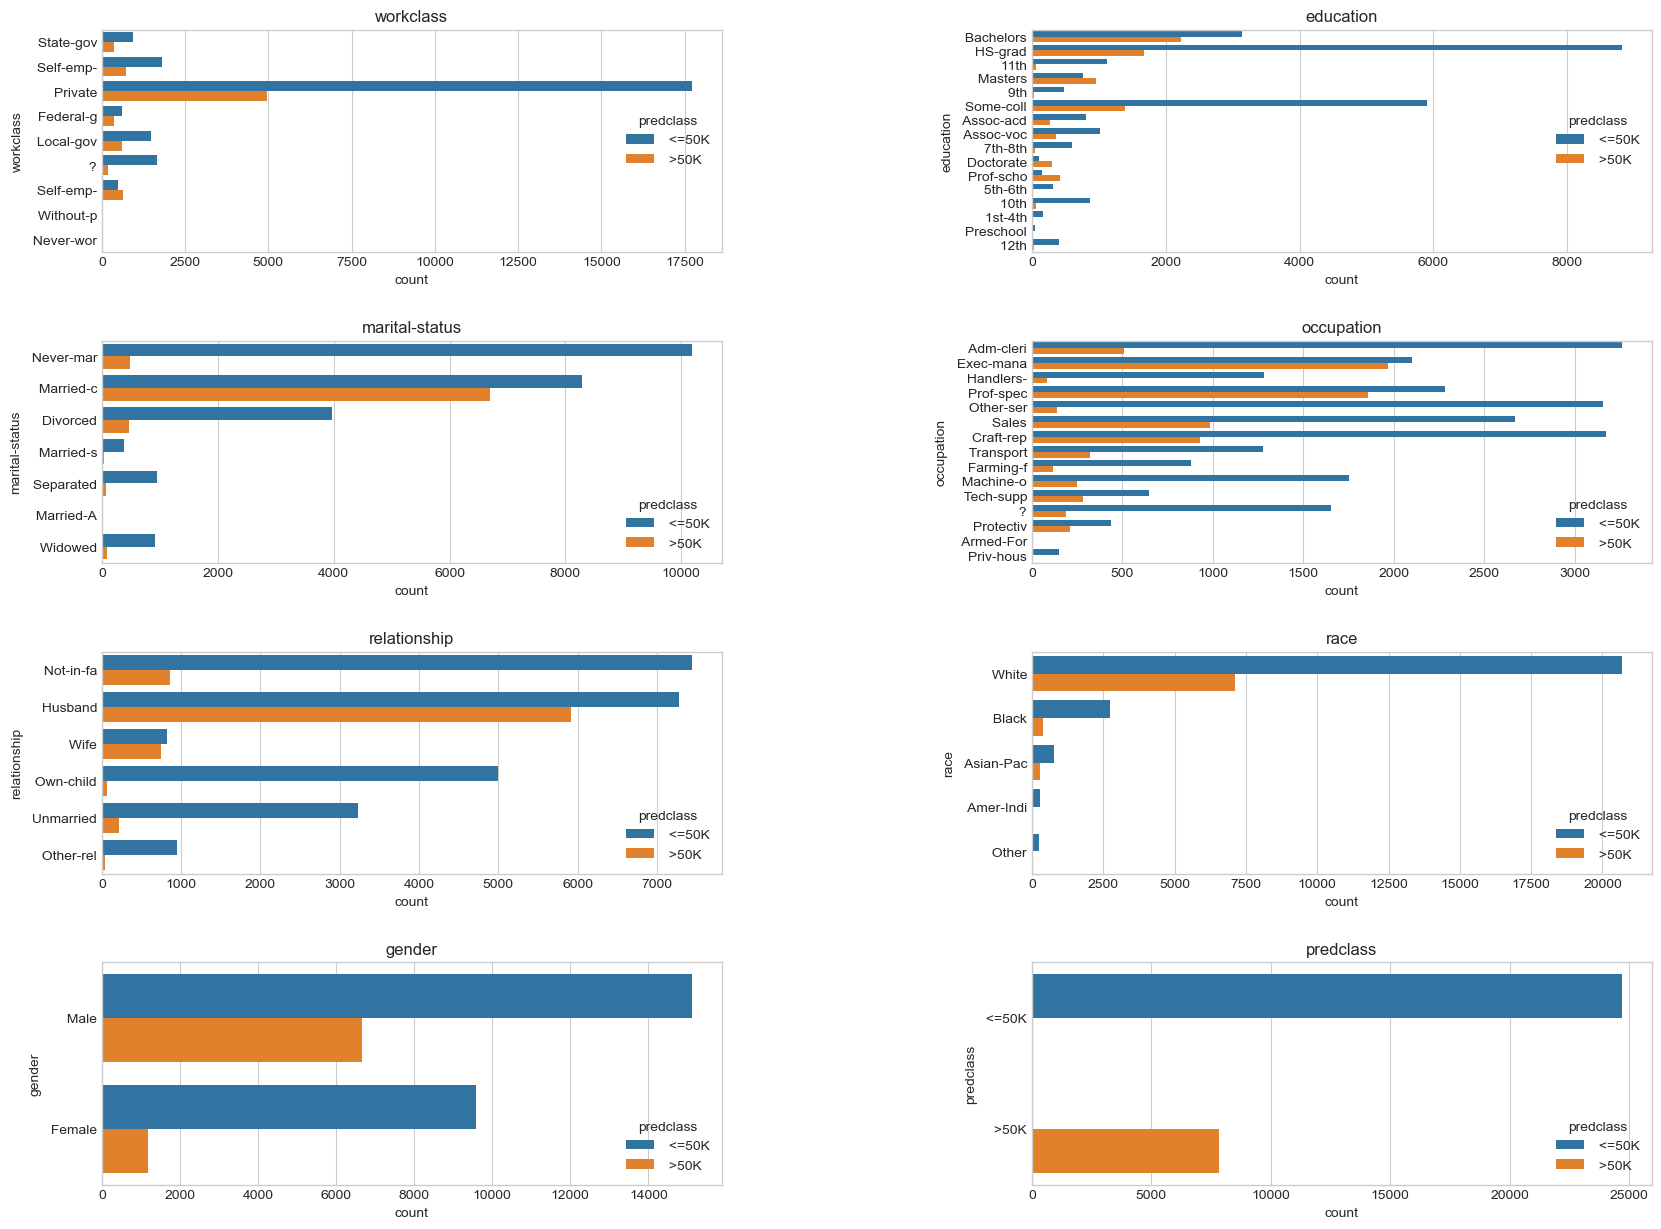

In [31]:
import math

def plot_bivariate_bar(dataset, hue, cols=5, width=20, height=15, hspace=0.2, wspace=0.5):
    dataset = dataset.select_dtypes(include=[np.object])
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(width,height))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    rows = math.ceil(float(dataset.shape[1]) / cols)
    for i, column in enumerate(dataset.columns):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_title(column)
        if dataset.dtypes[column] == np.object:
            g = sns.countplot(y=column, hue=hue, data=dataset)
            substrings = [s.get_text()[:10] for s in g.get_yticklabels()]
            g.set(yticklabels=substrings)
            
bivariate_df = my_df.loc[:, ['workclass', 'education', 
           'marital-status', 'occupation', 
           'relationship', 'race', 'gender','predclass']]  

plot_bivariate_bar(bivariate_df, hue='predclass', cols=2, width=20, height=15, hspace=0.4, wspace=0.5)

The dataset was created in 1996, a large number of jobs fall into the category of mannual labor, e.g., Handlers cleaners,
craft repairers, etc. Executive managerial role and some one with a professional speciality has a high level payment

# Occupation vs. Income Leve

<AxesSubplot:xlabel='occupation', ylabel='age'>

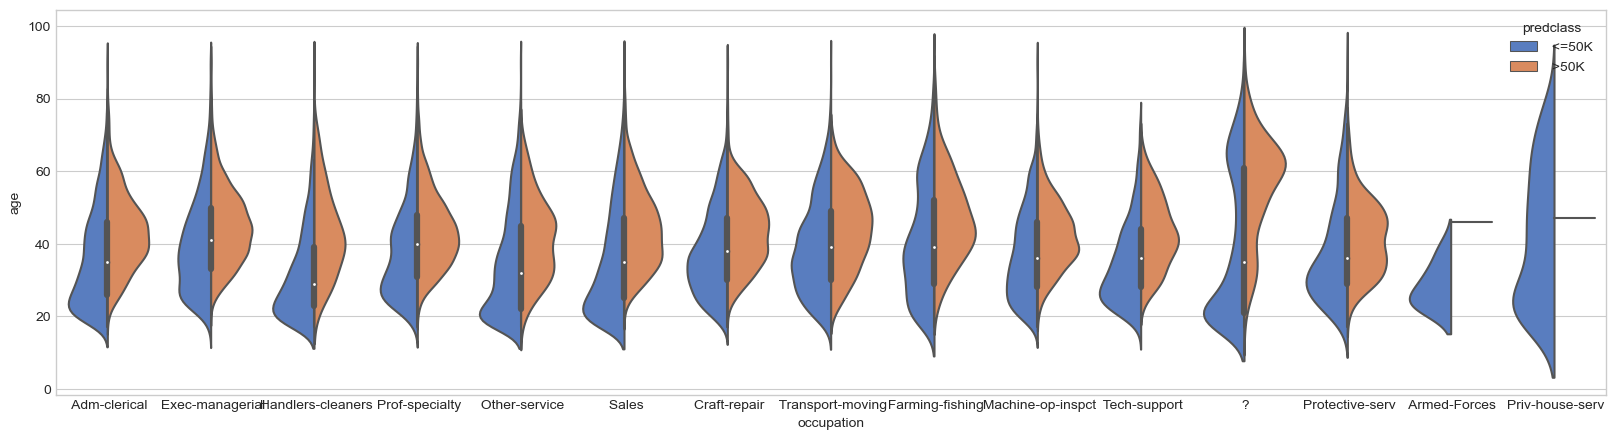

In [32]:
from matplotlib import pyplot
a4_dims = (20, 5)
fig, ax = pyplot.subplots(figsize=a4_dims)
ax = sns.violinplot(x="occupation", y="age", hue="predclass",
                    data=my_df, gridsize=100, palette="muted", split=True, saturation=0.75)
ax

The general trend is in sync with common sense: more senior workers have higher salaries. 
Armed-forces don't have a high job salaries.

Interestingly, private house sevice has the widest range of age variation, however, the payment is no higher than 50K, 
indicating that senority doesn't give rise to a higher payment comparing to other jobs

# Race vs. Income Level

<AxesSubplot:xlabel='race', ylabel='age'>

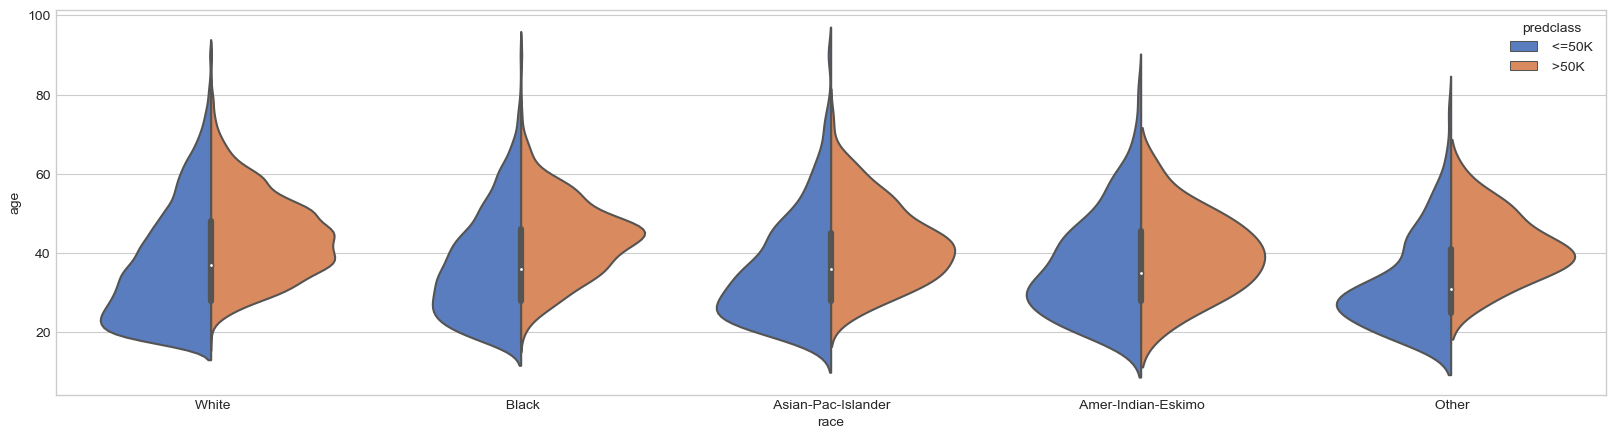

In [33]:
from matplotlib import pyplot
a4_dims = (20, 5)
fig, ax = pyplot.subplots(figsize=a4_dims)
ax = sns.violinplot(x="race", y="age", hue="predclass",
                    data=my_df, gridsize=100, palette="muted", split=True, saturation=0.75)
ax

# Building Machine Learning Models

In [34]:
from sklearn.cluster import KMeans
from matplotlib import cm
from sklearn.metrics import silhouette_samples
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score

from sklearn.decomposition import PCA
from pandas.plotting import scatter_matrix
from mpl_toolkits.mplot3d import Axes3D

from sklearn.model_selection import GridSearchCV


#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix
#train,test=train_test_split(train_df,test_size=0.2,random_state=0,stratify=abalone_data['Sex'])

# Feature Encoding

In [35]:
# Feature Selection and Encoding
from sklearn.svm import SVR
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split #training and testing data split

In [36]:
my_df = my_df.apply(LabelEncoder().fit_transform)
my_df.head()

age  workclass  fnlwgt  education  marital-status  occupation  \
0   22          7    2671          9               4           1   
1   33          6    2926          9               2           4   
2   21          4   14086         11               0           6   
3   36          4   15336          1               2           6   
4   11          4   19355          9               2          10   

   relationship  race  gender  capital-gain  capital-loss  hours-per-week  \
0             1     4       1            25             0              39   
1             0     4       1             0             0              12   
2             1     4       1             0             0              39   
3             0     2       1             0             0              39   
4             5     2       0             0             0              39   

   native-country  predclass  education-num  age_bin  hours-per-week_bin  \
0              39          0             12        6                   3   
1              39          0             12        9                   1   
2              39          0              8        5                   3   
3              39          0              6        9                   3   
4               5          0             12        3                   3   

   age-hours  age-hours_bin  
0        631              1  
1        290              0  
2        620              1  
3        810              2  
4        477              1

# Train-test split

In [37]:
drop_elements = ['education', 'native-country', 'predclass', 'age_bin', 'age-hours_bin','hours-per-week_bin']
y = my_df["predclass"]
X = my_df.drop(drop_elements, axis=1)
X.head()

age  workclass  fnlwgt  marital-status  occupation  relationship  race  \
0   22          7    2671               4           1             1     4   
1   33          6    2926               2           4             0     4   
2   21          4   14086               0           6             1     4   
3   36          4   15336               2           6             0     2   
4   11          4   19355               2          10             5     2   

   gender  capital-gain  capital-loss  hours-per-week  education-num  \
0       1            25             0              39             12   
1       1             0             0              12             12   
2       1             0             0              39              8   
3       1             0             0              39              6   
4       0             0             0              39             12   

   age-hours  
0        631  
1        290  
2        620  
3        810  
4        477

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Principal Component Analysis (PCA)

In [39]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

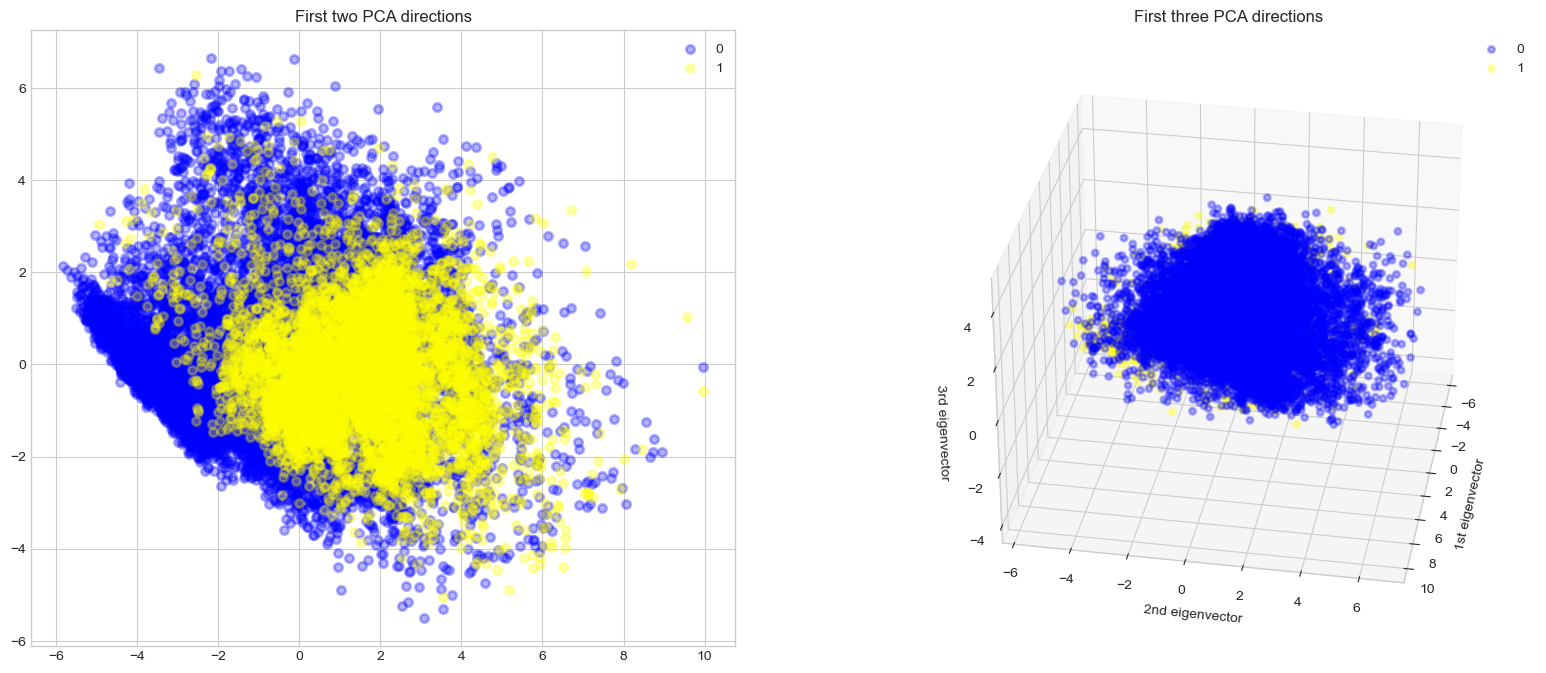

In [40]:
# PCA's components graphed in 2D and 3D
# Apply Scaling 
std_scale = preprocessing.StandardScaler().fit(my_df.drop('predclass', axis=1))
X = std_scale.transform(my_df.drop('predclass', axis=1))
y = my_df['predclass']

# Formatting
target_names = [0,1]
colors = ['blue','yellow','pink']
lw = 2
alpha = 0.3
# 2 Components PCA
plt.style.use('seaborn-whitegrid')
plt.figure(2, figsize=(20, 8))

plt.subplot(1, 2, 1)
pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)
for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], 
                color=color, 
                alpha=alpha, 
                lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('First two PCA directions');
# 3 Components PCA
ax = plt.subplot(1, 2, 2, projection='3d')

pca = PCA(n_components=3)
X_reduced = pca.fit(X).transform(X)
for color, i, target_name in zip(colors, [0, 1], target_names):
    ax.scatter(X_reduced[y == i, 0], X_reduced[y == i, 1], X_reduced[y == i, 2], 
               color=color,
               alpha=alpha,
               lw=lw, 
               label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.set_ylabel("2nd eigenvector")
ax.set_zlabel("3rd eigenvector")

# rotate the axes
ax.view_init(30, 10)

In [41]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
pca = PCA(n_components=None)
x_train_pca = pca.fit_transform(X_train_std)
a = pca.explained_variance_ratio_
a_running = a.cumsum()
a_running

array([0.21141111, 0.31530474, 0.40936437, 0.49090168, 0.57059516,
       0.64780627, 0.72145442, 0.79187467, 0.85444727, 0.91412814,
       0.96824953, 0.99798581, 1.        ])

# Classification Models

In [42]:
a=[]

# Logistic Regression

In [43]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
score_logreg = logreg.score(X_test,y_test)
a.append(score_logreg)
print('The accuracy of the Logistic Regression is', score_logreg)

The accuracy of the Logistic Regression is 0.804544756640565


predict income for test data

In [44]:
p1 = logreg.predict(X_test)

# Random Forest Classifier

In [45]:
# Random Forest Classifier
randomforest = RandomForestClassifier()
randomforest.fit(X_train, y_train)
score_randomforest = randomforest.score(X_test,y_test)
a.append(score_randomforest)
print('The accuracy of the Random Forest Model is', score_randomforest)

The accuracy of the Random Forest Model is 0.8502994011976048


predict income for test data

In [46]:
p2= randomforest.predict(X_test)

#  K-Nearest Neighbors

In [47]:
# K-Nearest Neighbors
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
score_knn = knn.score(X_test,y_test)
a.append(score_knn)
print('The accuracy of the KNN Model is',score_knn)

The accuracy of the KNN Model is 0.7581759557807461


predict income for test data

In [48]:
p3 = knn.predict(X_test)

# Decision tree

In [49]:
#decision tree
dec_tree= DecisionTreeClassifier(random_state=50)
dec_tree.fit(X_train,y_train)
score_dectree=dec_tree.score(X_test,y_test)
a.append(score_dectree)
print("The accuracy of the Decision Tree model is :",dec_tree.score(X_test,y_test))#to print the accuracy

The accuracy of the Decision Tree model is : 0.8020881314294488


predict income for test data

In [50]:
p4=dec_tree.predict(X_test)

# Support Vector Classifier

In [51]:
#SVC
svc=Pipeline([('scaler',StandardScaler()), 
               ('svc',LinearSVC(random_state=1))])
svc.fit(X_train, y_train)
score_svc=svc.score(X_test,y_test)
a.append(score_svc)
print("The accuracy of the SVC model is ",svc.score(X_test,y_test))

The accuracy of the SVC model is  0.822201750345463


predict income for test data

In [52]:
p5=svc.predict(X_test)

# Plotting confusion matrix using sklearn.metrics.Confusion_matrix and heatmap of seaborn library

In [53]:
from sklearn.metrics import confusion_matrix

Logistic Regression confusion matrix

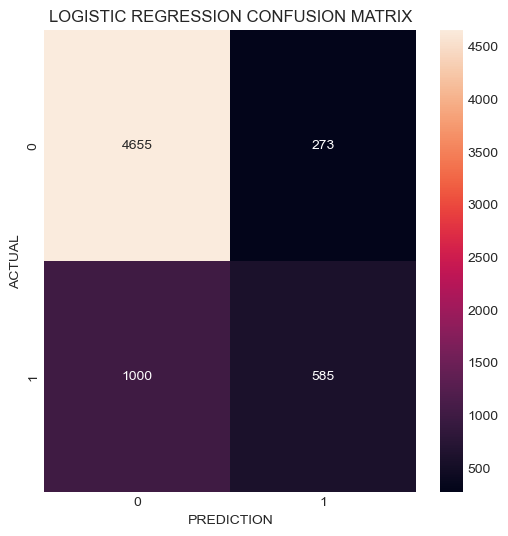

In [54]:
conf_mat1=confusion_matrix(y_test,p1)
plt.figure(figsize=(6,6))
sns.heatmap(conf_mat1,annot=True,fmt=".0f")
plt.ylabel("ACTUAL")
plt.xlabel("PREDICTION")
plt.title("LOGISTIC REGRESSION CONFUSION MATRIX")
plt.show()

Random Forest confusion matrix

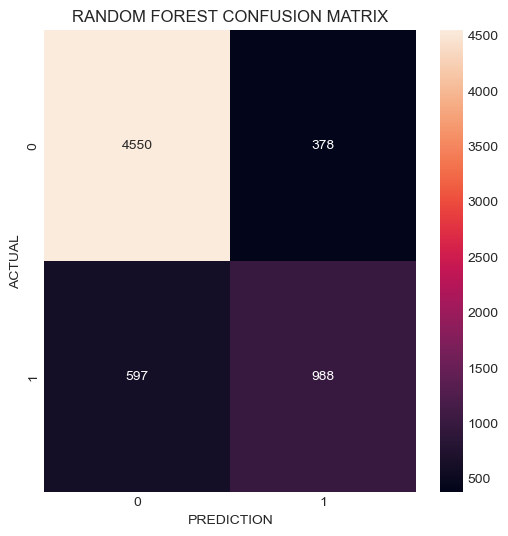

In [55]:
conf_mat2=confusion_matrix(y_test,p2)
plt.figure(figsize=(6,6))
sns.heatmap(conf_mat2,annot=True,fmt=".0f")
plt.ylabel("ACTUAL")
plt.xlabel("PREDICTION")
plt.title("RANDOM FOREST CONFUSION MATRIX")
plt.show()

KNN Confusion matrix

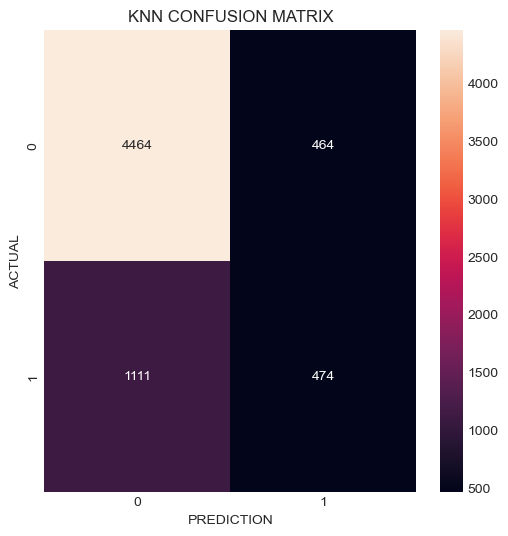

In [56]:
conf_mat3=confusion_matrix(y_test,p3)
plt.figure(figsize=(6,6))
sns.heatmap(conf_mat3,annot=True,fmt=".0f")
plt.ylabel("ACTUAL")
plt.xlabel("PREDICTION")
plt.title("KNN CONFUSION MATRIX")
plt.show()

SVC confusion matrix

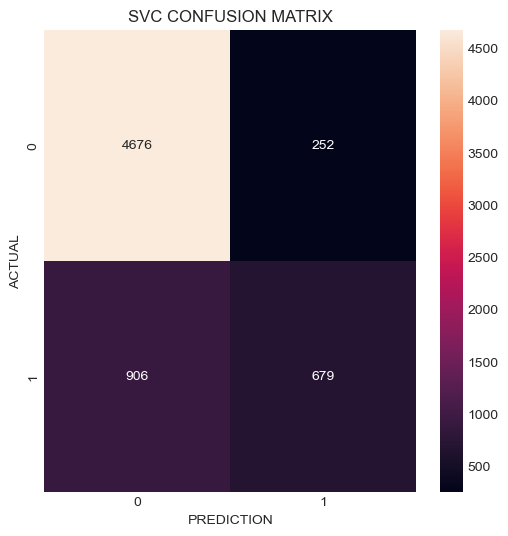

In [57]:
conf_mat5=confusion_matrix(y_test,p5)
plt.figure(figsize=(6,6))
sns.heatmap(conf_mat5,annot=True,fmt=".0f")
plt.ylabel("ACTUAL")
plt.xlabel("PREDICTION")
plt.title("SVC CONFUSION MATRIX")
plt.show()

Decision Tree Confusion Matrix

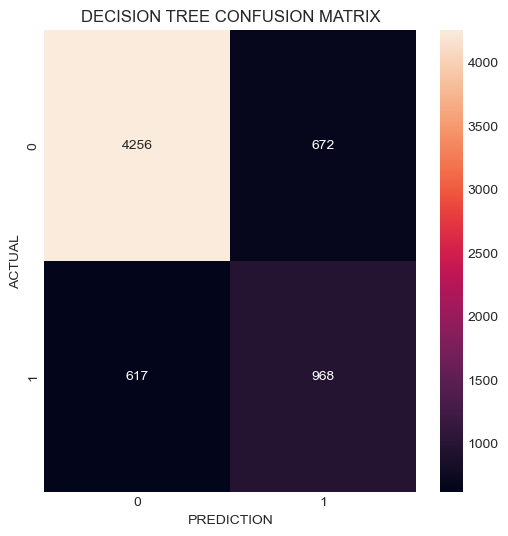

In [58]:
conf_mat4=confusion_matrix(y_test,p4)
plt.figure(figsize=(6,6))
sns.heatmap(conf_mat4,annot=True,fmt=".0f")
plt.ylabel("ACTUAL")
plt.xlabel("PREDICTION")
plt.title("DECISION TREE CONFUSION MATRIX")
plt.show()

# Printing the classification report of different models used using sklearn.metrics library and classification report function.

In [59]:
from sklearn.metrics import classification_report
#import the exact function

Logistic Regression classification report

In [60]:
report_lr=classification_report(y_test,p1)
print(report_lr)

              precision    recall  f1-score   support

           0       0.82      0.94      0.88      4928
           1       0.68      0.37      0.48      1585

    accuracy                           0.80      6513
   macro avg       0.75      0.66      0.68      6513
weighted avg       0.79      0.80      0.78      6513



Random Forest clasiification report

In [61]:
report_random_forest=classification_report(y_test,p2)
print(report_random_forest)

              precision    recall  f1-score   support

           0       0.88      0.92      0.90      4928
           1       0.72      0.62      0.67      1585

    accuracy                           0.85      6513
   macro avg       0.80      0.77      0.79      6513
weighted avg       0.84      0.85      0.85      6513



KNN Classification Report

In [62]:
report_knn=classification_report(y_test,p3)
print(report_knn)

              precision    recall  f1-score   support

           0       0.80      0.91      0.85      4928
           1       0.51      0.30      0.38      1585

    accuracy                           0.76      6513
   macro avg       0.65      0.60      0.61      6513
weighted avg       0.73      0.76      0.73      6513



Decision Tree classification Report

In [63]:
report_dec_tree=classification_report(y_test,p4)
print(report_dec_tree)

              precision    recall  f1-score   support

           0       0.87      0.86      0.87      4928
           1       0.59      0.61      0.60      1585

    accuracy                           0.80      6513
   macro avg       0.73      0.74      0.73      6513
weighted avg       0.80      0.80      0.80      6513



SVC Classification Report

In [64]:
report_svc=classification_report(y_test,p5)
print(report_svc)

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4928
           1       0.73      0.43      0.54      1585

    accuracy                           0.82      6513
   macro avg       0.78      0.69      0.71      6513
weighted avg       0.81      0.82      0.80      6513



# Validate the result for Precision, Recall, F1-score and Accuracy for each model based on values
from confusion_matrix and classification_report

# 1.Confusion matrix

1.True Positive (TP): True positive measures the extent to which the model correctly predicts the positive class. That is,
the model predicts that the instance is positive, and the instance is actually positive. 

2.False Positive (FP): False positives occur when the model predicts that an instance belongs to a class that it actually does not. False positives can be problematic because they can lead to incorrect decision-making. For example, if a medical diagnosis model has a high false positive rate, it may result in patients undergoing unnecessary treatment.

3.True Negative (TN): True negatives are the outcomes that the model correctly predicts as negative. For example, if the model is predicting whether or not a person has a disease, a true negative would be when the model predicts that the person does not have the disease and they actually don’t have the disease.

4.False Negative (FN): A false negative occurs when a model predicts an instance as negative when it is actually positive. False negatives can be very costly, especially in the field of medicine. For example, if a cancer screening test predicts that a patient does not have cancer when they actually do, this could lead to the disease progressing without treatment.


# Precision Score

Precision Score = TP / (FP + TP) (This precision score of 1)

The precision score from the above confusion matrix will come out to be the following

For Logistic regression

precision score = 493 /(186+493)=0.7266 
after round off the value is 0.73 which is the same result given in the classification report

For Random forest

precision score = 991/(372+991)=0.7270 
after round off the value is 0.73 which is the same result given in the classification report

For KNN

precision score = 474 /(464+474)=0.50533
after round off the value is 0.51 which is the same result given in the classification report

For Decision Tree

precision score = 968 /(672+968)=0.5902
after round off the value is 0.59 which is the same result given in the classification report

For SVC

precision score = 679/(252+679)=0.7293
after round off the value is 0.73 which is the same result given in the classification report

# Recall Score

Model recall score represents the model’s ability to correctly predict the positives out of actual positives. This is unlike precision which measures how many predictions made by models are actually positive out of all positive predictions made. For example: If your machine learning model is trying to identify positive reviews, the recall score would be what percent of those positive reviews did your machine learning model correctly predict as a positive. 

Recall Score = TP / (FN + TP) (This is Recall Score of 1) 

For logistic regression 

Recall score = 493/(1092+493)=0.3111
after round off the value is 0.31 which is the same result given in the classification report

For Random Forest

Recall score = 991/(594+991)=0.6252
after round off the value is 0.63 which is the same result given in the classification report

For KNN

Recall score = 474/(1111+474)=0.2990
after round off the value is 0.30 which is the same result given in the classification report

For Decision Tree

Recall score = 968/(617+968)=0.6107
after round off the value is 0.61 which is the same result given in the classification report

For SVC

Recall score = 679/(906+679)=0.4283
after round off the value is 0.43 which is the same result given in the classification report

# Accuracy Score

Model accuracy is a machine learning classification model performance metric that is defined as the ratio of true positives and true negatives to all positive and negative observations. In other words, accuracy tells us how often we can expect our machine learning model will correctly predict an outcome out of the total number of times it made predictions. 

Accuracy Score = (TP + TN)/ (TP + FN + TN + FP)

For Logistic regression

Accuracy Score = (493+4742)/(4742+186+1092+493)=0.803
after round off the value is 0.80 which is the same result given in the classification report

For Random Forest

Accuracy Score = (991+4556)/(991+594+4556+372)=0.851
after round off the value is 0.85 which is the same result given in the classification report

For KNN

Accuracy Score = (474+4464)/(474+464+4464+1111)=0.7581
after round off the value is 0.76 which is the same result given in the classification report

For Decision Tree

Accuracy Score = (968+4256)/(968+672+4256+617)=0.802
after round off the value is 0.80 which is the same result given in the classification report

For SVC 

Accuracy Score = (679+4676)/(679+252+4676+906)=0.822
after round off the value is 0.82 which is the same result given in the classification report

# F1-Score 

Model F1 score represents the model score as a function of precision and recall score. F-score is a machine learning model
performance metric that gives equal weight to both the Precision and Recall for measuring its performance in terms of accuracy, 
making it an alternative to Accuracy metrics (it doesn’t require us to know the total number of observations)

As we know that all the above data values are validated ae can use those data to validate the F1 Score 

F1 score=2* Precision Score * Recall Score/ (Precision Score + Recall Score)( this is f1 score of 1)

For logistic regression 

In [65]:
lF1_score=(2*0.73*0.31)/(0.73+0.31)
print(lF1_score)

0.43519230769230766


after round off the value is 0.44 which is the same result given in the classification report

For Random Forest

In [66]:
rF1_score=(2*0.73*0.63)/(0.73+0.63)
print(rF1_score)

0.6763235294117648


after round off the value is 0.67 which is the same result given in the classification report

For KNN

In [67]:
KF1_score=(2*0.51*0.30)/(0.51+0.30)
print(KF1_score)

0.37777777777777777


after round off the value is 0.38 which is the same result given in the classification report

For Decision Tree

In [68]:
DF1_score=(2*0.59*0.61)/(0.59+0.61)
print(DF1_score)

0.5998333333333333


after round off the value is 0.60 which is the same result given in the classification report

For SVC

In [69]:
SF1_score=(2*0.73*0.43)/(0.73+0.43)
print(SF1_score)

0.5412068965517242


after round off the value is 0.54 which is the same result given in the classification report

# Calulating the percentage of misclassification using the pie chart

For Logistic regression

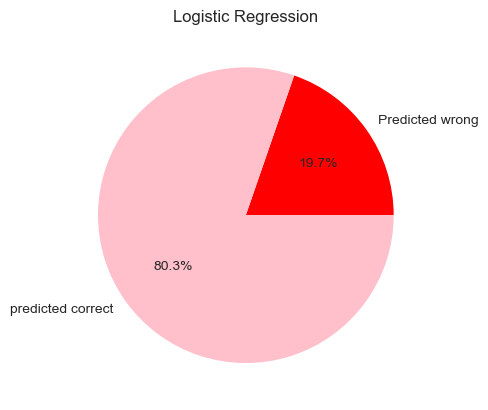

In [70]:
comp1=[124.89,509.10]
l1=['Predicted wrong','predicted correct']
plt.pie(comp1,labels=l1,autopct='%0.1f%%',colors=['red','pink'])
plt.title('Logistic Regression')
plt.show()

For Random Forest

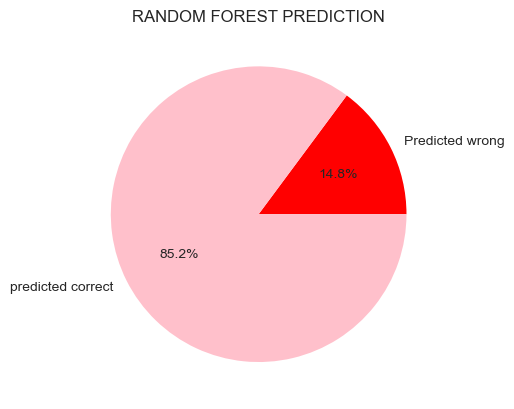

In [71]:
comp1=[94.08,539.9]
l1=['Predicted wrong','predicted correct']
plt.pie(comp1,labels=l1,autopct='%0.1f%%',colors=['red','pink'])
plt.title('RANDOM FOREST PREDICTION')
plt.show()

For KNN

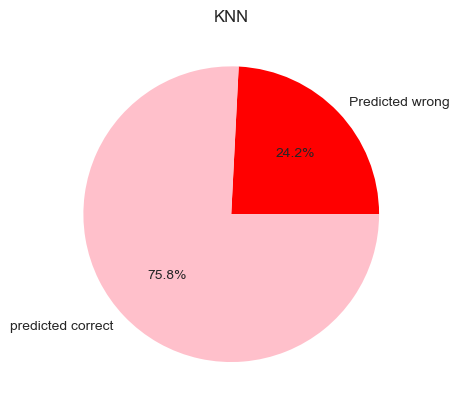

In [72]:
comp1=[153.4,480.57]
l1=['Predicted wrong','predicted correct']
plt.pie(comp1,labels=l1,autopct='%0.1f%%',colors=['red','pink'])
plt.title('KNN')
plt.show()

For Decision tree

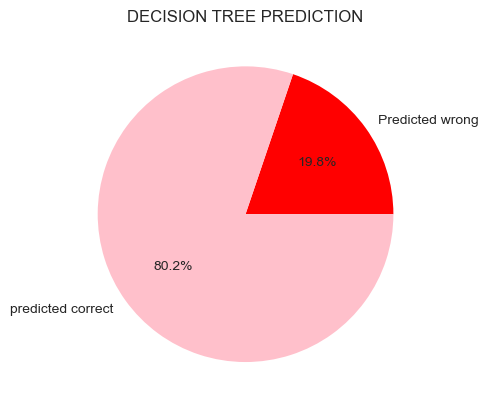

In [73]:
comp1=[125.5,508.4]
l1=['Predicted wrong','predicted correct']
plt.pie(comp1,labels=l1,autopct='%0.1f%%',colors=['red','pink'])
plt.title('DECISION TREE PREDICTION')
plt.show()

For SVC

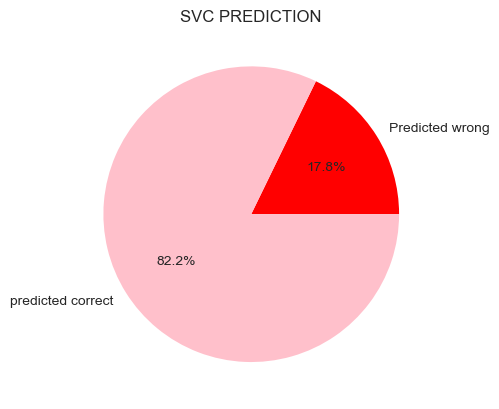

In [74]:
comp1=[112.8,521.1]
l1=['Predicted wrong','predicted correct']
plt.pie(comp1,labels=l1,autopct='%0.1f%%',colors=['red','pink'])
plt.title('SVC PREDICTION')
plt.show()

# The model with the best accuracy

Using the line chart we are going to find the model which has best accuracy

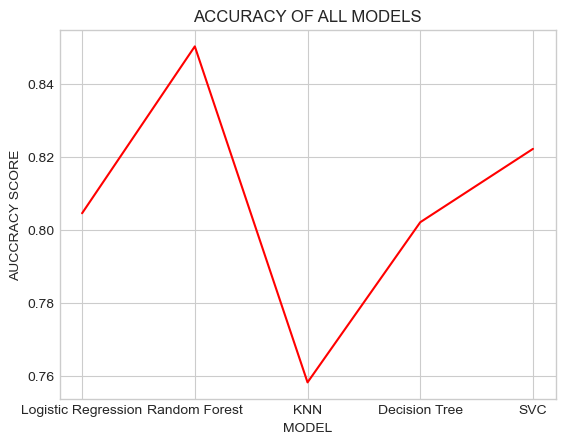

In [75]:
b=["Logistic Regression","Random Forest","KNN","Decision Tree","SVC"]
plt.plot(b,a,color='red')
plt.title("ACCURACY OF ALL MODELS")
plt.xlabel("MODEL")
plt.ylabel("AUCCRACY SCORE")
plt.show()

CONCULSION : BASED ON THE RESULTS OF THE PIE CHARTS,CONFUSION_MATRIX,CLASSIFICATION REPORT AND LINE CHART. WE CAN SAY THAT THE RANDOM FOREST CLASSIFICATION IS THE BEST SUITED FOR THIS PROBLEM WHERE WE ARE PREDICTING WHETHER A PERSON MAKES OVER $50K A
YEAR BASED ON THE DIFFERENT PARAMETERS